# k-Means Clustering

First let's import the libraries will be using for this tutorial. We will be using matplotlib to plot our graphs, and sklearn for the dataset and k-Means.

In [3]:
# Library Imports
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

**Step 1:**

Once again we'll be using the Iris dataset, so loading it is simple. Let's quickly plot the dataset as well.

In [5]:
# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

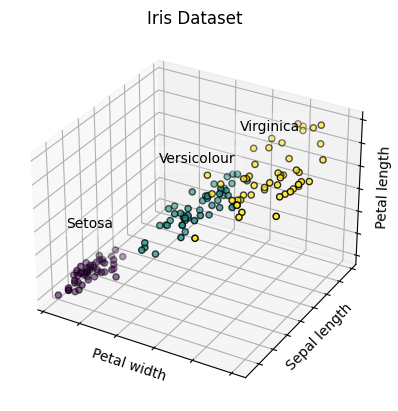

In [10]:
# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()
x = iris.data
y = iris.target

# 3D Data Plot and Settings
def create_plot(x, y, title, group_label):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)
    ax.xaxis.labelpad=-10
    ax.yaxis.labelpad=-10
    ax.zaxis.labelpad=-10

    if group_label:
        for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
            ax.text3D(
                x[y == label, 3].mean(),
                x[y == label, 0].mean(),
                x[y == label, 2].mean() + 2,
                name,
                horizontalalignment="center",
                bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
            )

    plt.show()

create_plot(x, y, "Iris Dataset", True)

**Step 2:**

Recall that our data can often contain variables of different magnitudes, such us some in tens and other in thousands. To calculate their distance, we can use normalisation to remap them to fix a range so each variable has an equal weight. In sklearn, we can use `sklearn.preprocessing.MinMaxScaler` to normalise the iris measurements to the range [0, 1], or any other range we want.

**normalisation**

In [11]:
# Check the first row of measurements before normalisation
print(x[0].round(2))

# Normalise measurements to [0, 1]
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(iris.data)

# Check the first row of measurements after normalisation
print(x[0].round(2))

[5.1 3.5 1.4 0.2]
[0.22 0.62 0.07 0.04]


**Step 3:**

Now we can use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) function to perform k-Means clustering and plot the results. (Notice how in the ouput graph, the clusters are switched around each time you re-run the cell. This is because k-Means only creates clusters and has no way of knowing which is which.)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


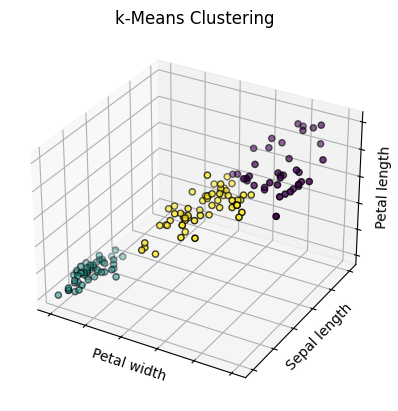

In [39]:
# Create our k-Means model with k = 3
clusterer = KMeans(n_clusters=3)
# Fit the model to our data
clusterer.fit(x)
# Output clusters from our models
cluster_labels = clusterer.labels_

# Draw 3D Plot
create_plot(x, cluster_labels, "k-Means Clustering", False)

Try adjusting some of the KMeans parameters and seeing how the results change:

- n_clusters: k value, number of clusters that KMeans finds
- n_init: Number of times KMeans is run with different random centroid seeds, also known as k-Means++
- max_iter: Maximum iterations of KMeans for a run
- algorithm: Whether to use LLoyd's or Elkan's algorithm (depending on dataset, might have performance or runtime differences)

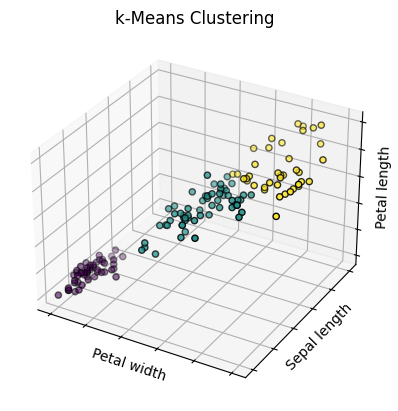

In [29]:
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, n_init=20, algorithm="elkan")
clusterer.fit(x)
cluster_labels = clusterer.labels_

create_plot(x, cluster_labels, "k-Means Clustering", False)

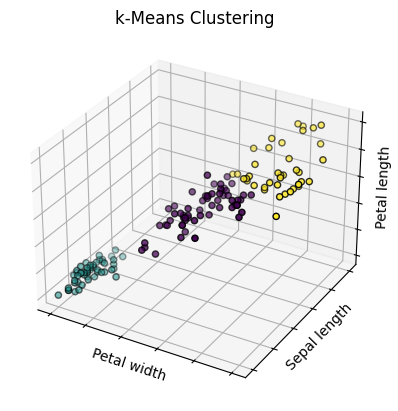

In [36]:
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, n_init=20, algorithm="elkan")
clusterer.fit(x)
cluster_labels = clusterer.labels_

create_plot(x, cluster_labels, "k-Means Clustering", False)

## Silhouette Score

**Silhouette score** is a way to measure how good clusters are. It ranges from -1 to 1. The higher the score, the more distinct the clusters are:
*    an average silhouette score of over 0.7 is considered to be "strong", a value over 0.5 "reasonable" and over 0.25 "weak"
*    For a specific point, it's silhouette score is directly proportional to its distance from the cluster's centroid.
*    To determine how good the clustering is, we can take the average silhouette score of all points.

Thankfully we can use sklearn to automatically calculate the average silhouette score of a specific clustering.


In [40]:
silhouette_avg = silhouette_score(x, cluster_labels)
print(f"The average silhouette_score is {silhouette_avg:.3f}")

The average silhouette_score is 0.505


We can plot the silhouette scores on a graph to view them. The red dotted line is the overall average silhouette score:

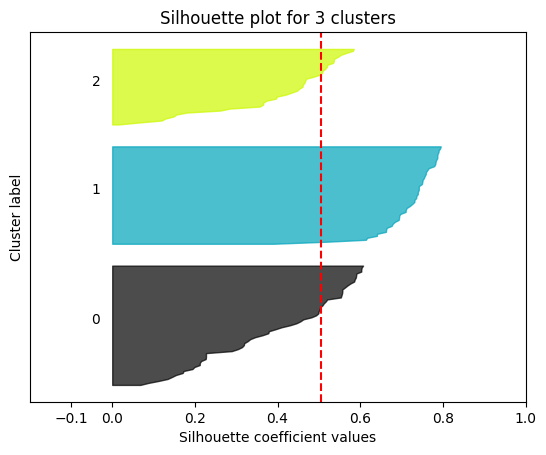

In [38]:
fig = plt.figure()
ax = fig.add_subplot()

# The silhouette coefficient can range from [-1, 1]
# but we can reduce the limits to maximise space usage
ax.set_xlim([-0.2, 1])

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Get silhouette scores for each sample in cluster i and sort tehem
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for " + str(n_clusters) + " clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticks([])

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

We can try different values of n_clusters, comparing their silhouette scores to see which is the most suitable value.

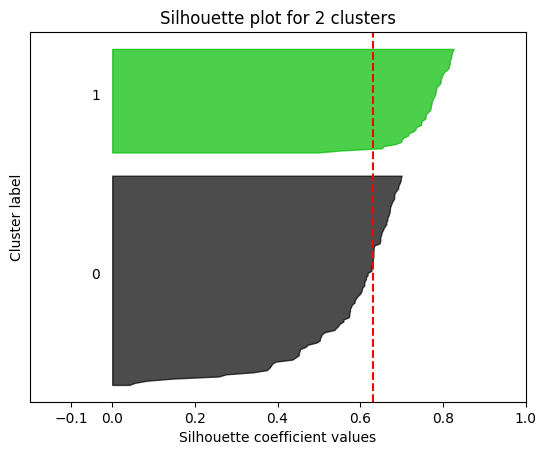

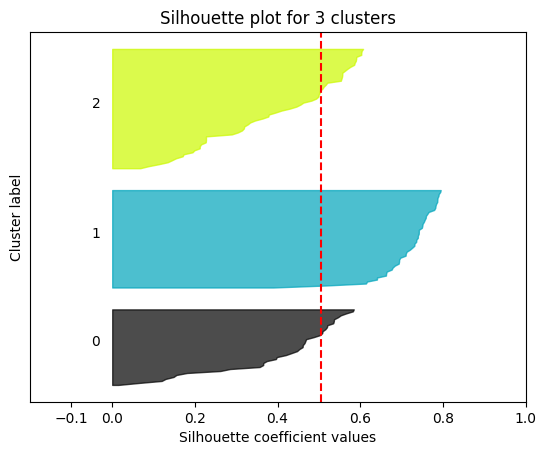

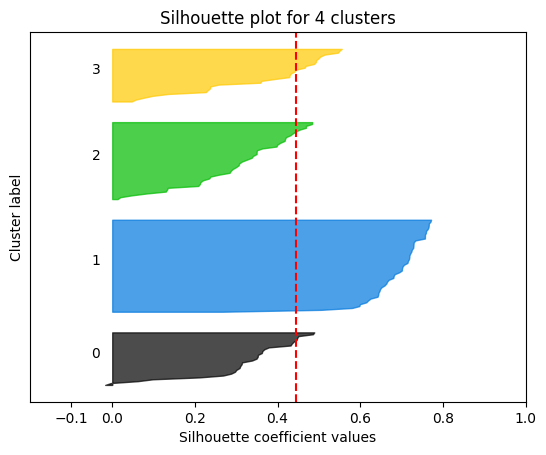

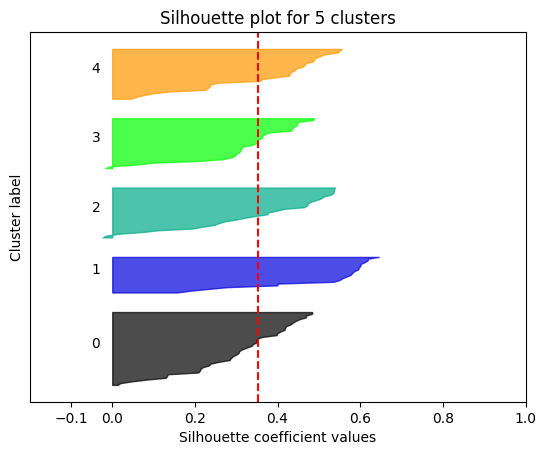

The best average silhouette_score is 0.630 using 2.000 clusters
The average silhouette_score for 2 clusters is 0.630
The average silhouette_score for 3 clusters is 0.505
The average silhouette_score for 4 clusters is 0.445
The average silhouette_score for 5 clusters is 0.353


In [41]:
range_n_clusters = [2, 3, 4, 5]
silhouette_scores = []
best_n = 0
highest_score = -10.0

# Do the plot for each value of n_clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, algorithm="elkan")
    clusterer.fit(x)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > highest_score:
        highest_score = silhouette_avg
        best_n = n_clusters

    fig = plt.figure()
    ax = fig.add_subplot()

    # The silhouette coefficient can range from [-1, 1]
    # but we can reduce the limits to maximise space usage
    ax.set_xlim([-0.2, 1])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for each sample in cluster i and sort tehem
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for " + str(n_clusters) + " clusters")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticks([])

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

# Output silhouette scores for each value along with best score
print(f"The best average silhouette_score is {highest_score:.3f} using {best_n:.3f} clusters")
for i, j in zip(range_n_clusters, silhouette_scores):
    print(f"The average silhouette_score for {i} clusters is {j:.3f}")


Calculating the silhouette score for multiple k values allows us to compare and choose the best number of clusters for our dataset. In the above case, 2 clusters give us the best silhouette score and is the ideal number of clusters.

## Exercise: Clustering

Let's try to implement clustering on a new dataset now. Feel free to search for your own dataset, or use the Mall Customer Dataset imported below. This dataset looks at the spending profiles of 200 mall customers.

*    Hint1: the Gender column is non-numeric. What can you do about that?
*    Hint2: you can still normalise a dataframe using MinMaxScaler()

In [129]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/iamamangosteen/aimlnotebooks/main/Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [130]:
#for i in range(len(data["Gender"])):
#  if data["Gender"][i] == "Male":
#    data["Gender"][i] = 1
#  else:
#    i = -1

#Better method VVVVVV

In [131]:
# 3 ways to access a single column of data
#data.loc[:, "Gender"]
#data["Gender"]
#data.Gender

#data["Gender"] = data["Gender"].apply(lambda gender : 1 if gender == "Female" else 0) #easier to understand
data["Gender"] = data["Gender"].apply(lambda gender : (gender == "Female")*1 - (gender == "Male")*1  )
                                                    # just think abt how the lambda functions

In [132]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1,19,15,39
1,2,-1,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,-1,32,126,74
198,199,-1,32,137,18


In [133]:
del data["CustomerID"]

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1,19,15,39
1,-1,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [134]:
min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data)

data[0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918]])

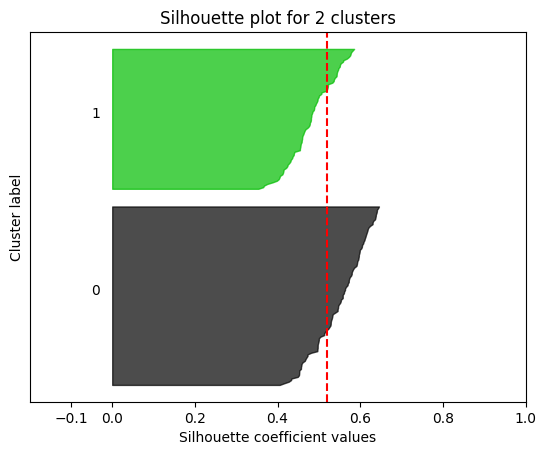

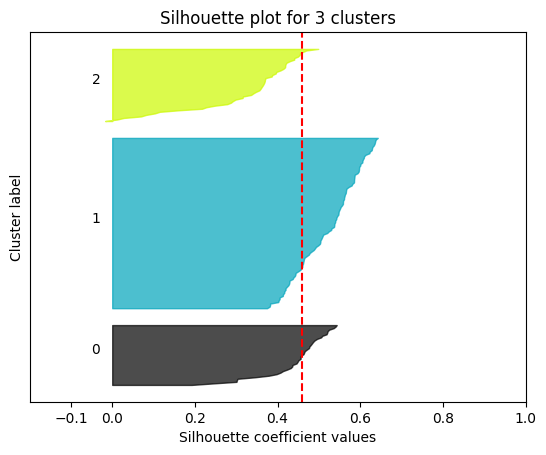

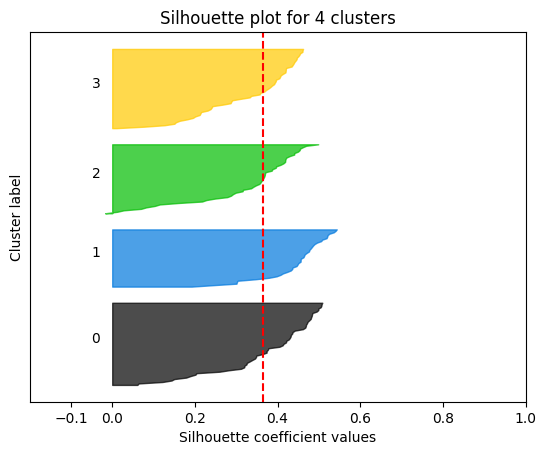

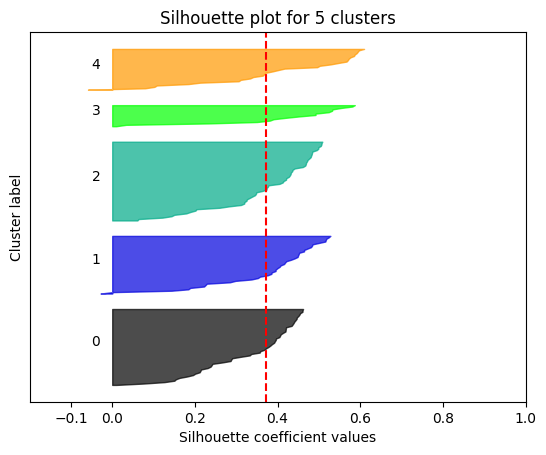

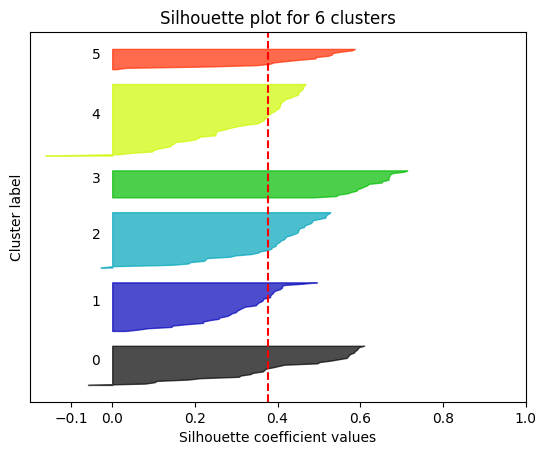

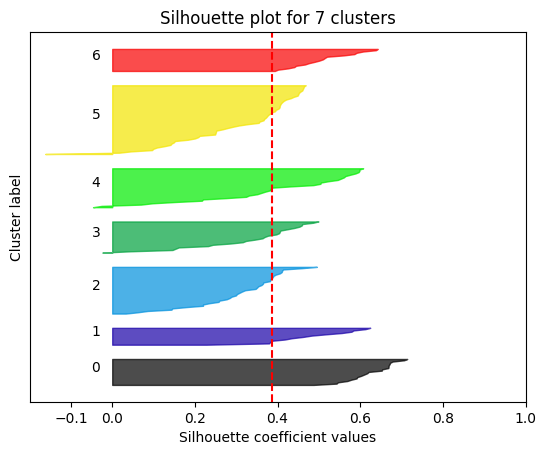

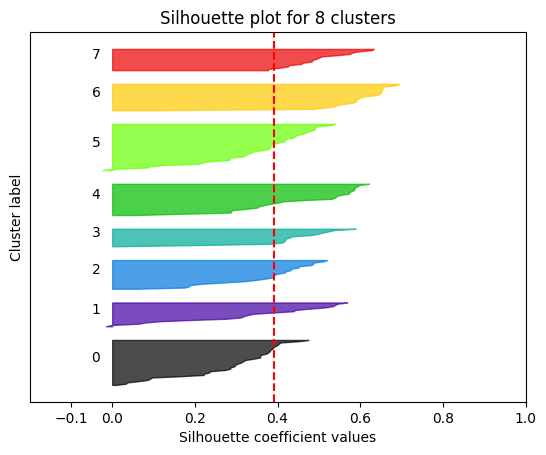

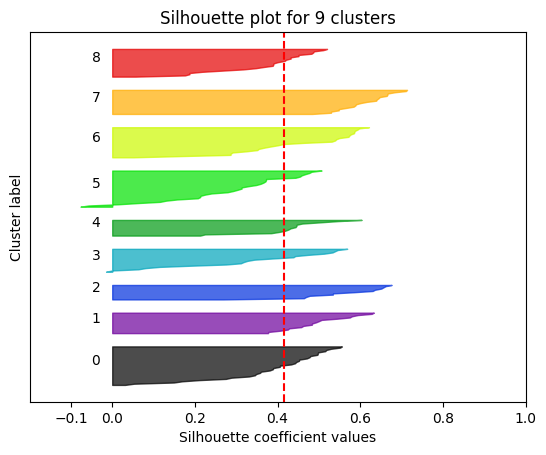

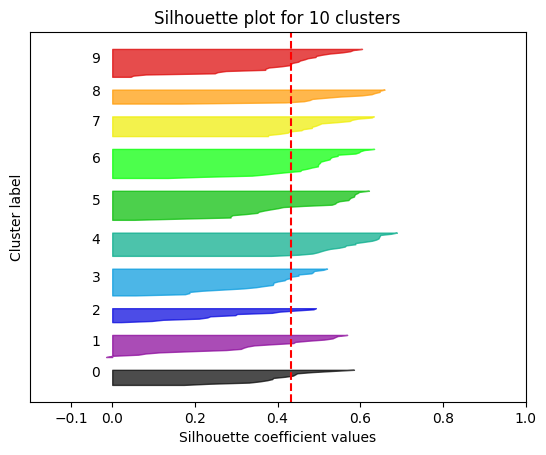

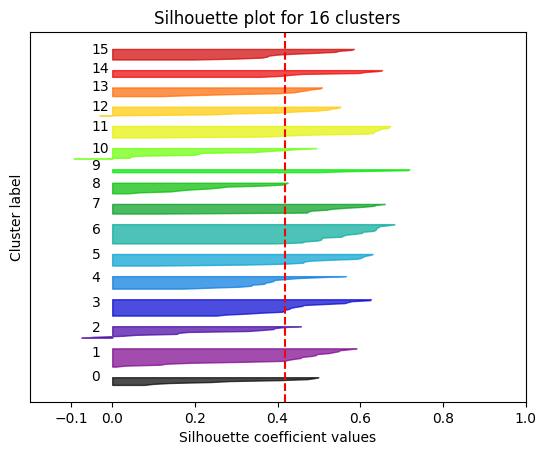

The best average silhouette_score is 0.519 using 2.000 clusters
The average silhouette_score for 2 clusters is 0.519
The average silhouette_score for 3 clusters is 0.458
The average silhouette_score for 4 clusters is 0.364
The average silhouette_score for 5 clusters is 0.371
The average silhouette_score for 6 clusters is 0.378
The average silhouette_score for 7 clusters is 0.385
The average silhouette_score for 8 clusters is 0.393
The average silhouette_score for 9 clusters is 0.416
The average silhouette_score for 10 clusters is 0.432
The average silhouette_score for 16 clusters is 0.417


In [139]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
silhouette_scores = []
best_n = 0
highest_score = -10.0

# Do the plot for each value of n_clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, algorithm="elkan")
    clusterer.fit(x)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > highest_score:
        highest_score = silhouette_avg
        best_n = n_clusters

    fig = plt.figure()
    ax = fig.add_subplot()

    # The silhouette coefficient can range from [-1, 1]
    # but we can reduce the limits to maximise space usage
    ax.set_xlim([-0.2, 1])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for each sample in cluster i and sort tehem
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for " + str(n_clusters) + " clusters")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticks([])

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

# Output silhouette scores for each value along with best score
print(f"The best average silhouette_score is {highest_score:.3f} using {best_n:.3f} clusters")
for i, j in zip(range_n_clusters, silhouette_scores):
    print(f"The average silhouette_score for {i} clusters is {j:.3f}")

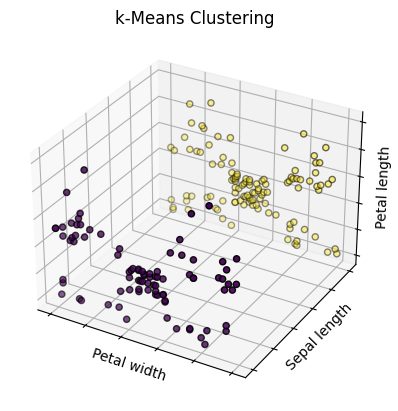

In [137]:
# Create our k-Means model with k = 3
clusterer = KMeans(n_clusters=2, n_init=20)
# Fit the model to our data
clusterer.fit(data)
# Output clusters from our models
cluster_labels = clusterer.labels_

# Draw 3D Plot
create_plot(data, cluster_labels, "k-Means Clustering", False)